In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

In [56]:
N = 1000
M = 800
q = 100 * M // (M+N)
print(q)

m = 20

Xs = []

rv_no = stats.multivariate_normal(np.zeros(m), np.identity(m))
X_no = rv_no.rvs(N)
Xs.append(X_no)

rv_wo_s = []
for i in range(m):
    loc_i = np.zeros(m, 'd')
    loc_i[i] = 7
    rv_wo = stats.multivariate_normal(loc_i, 0.1*np.identity(m))
    X_wo = rv_wo.rvs(M//m)
    Xs.append(X_wo)

X = np.concatenate(Xs)
X.shape
    

44


(1800, 20)

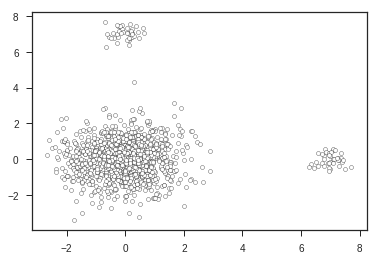

In [57]:
plt.scatter(X[:,0], X[:,1], c='w', s=16, edgecolors='k')
plt.show()

In [58]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.56, func.Sqrt(0.001))))
# avg = averager_it(func.QuantileFunc(0.56, func.Sqrt(1.0)))
mlse = mls.MLocationScatterEstimator(avg, n_step=30, n_iter=500, h=0.01)

In [59]:
%time mlse.fit(X)

CPU times: user 1min 21s, sys: 79.9 ms, total: 1min 22s
Wall time: 20.5 s


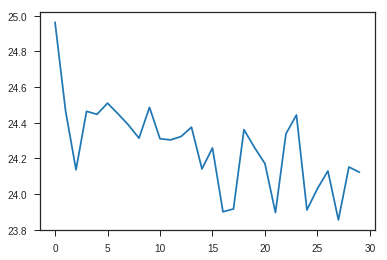

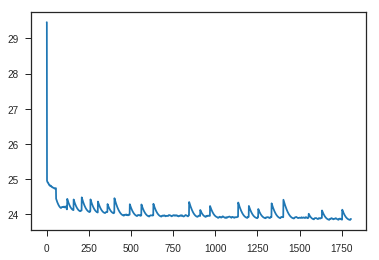

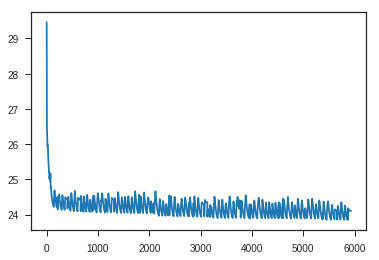

In [60]:
plt.plot(mlse.dvals)
plt.show()
plt.plot(mlse.mlocation.dvals)
plt.show()
plt.plot(mlse.mscatter.dvals)
plt.show()

In [61]:
loc, S = mlse.loc.base, mlse.S.base

loc0 = mls.standard_location(X)
S0 = mls.standard_covariance(X, loc0)

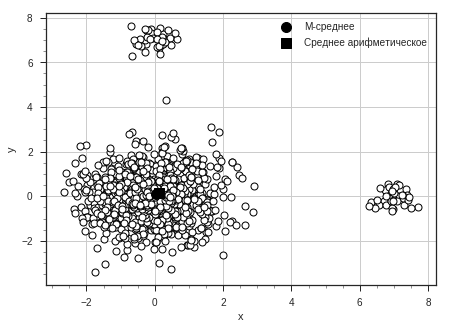

In [62]:
plt.figure(figsize=(7.0, 5.0))
plt.scatter(X[:,0], X[:,1], s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=100, c='k', edgecolors='k', linewidth=1., marker='o', label='M-среднее')
plt.scatter([loc0[0]], [loc0[1]], s=100, c='k', edgecolors='k', linewidth=1., marker='s', label='Среднее арифметическое')
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('fig/robust_clustering_dran_multinormal_scatter_%s_%s.eps' % (m, q))
plt.show()

In [63]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

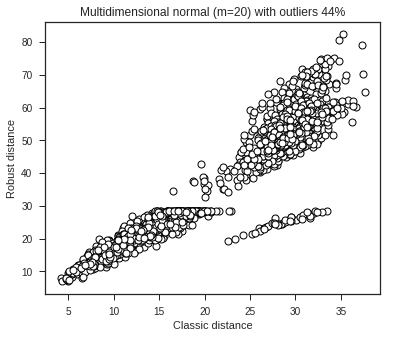

In [64]:
plt.figure(figsize=(6,5))
D0 = [distfunc0(x, loc0) for x in X]
D = [distfunc(x, loc) for x in X]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('Classic distance')
plt.ylabel('Robust distance')
plt.title('Multidimensional normal (m=%s) with outliers %s%%' % (m, q))
plt.savefig('fig/robust_location_scatter_multinormal2_%s_%s.eps' % (m, q))
plt.show()